In [81]:
#Importing the libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Importing the training Data file
data = pd.read_csv('G:/Python/Jupyter/Personal Projects/datasets/TMDB Box Office Prediction/train.csv',encoding='latin-1')
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,08-06-2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10-10-2014,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,03-09-2012,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,????,Marine Boy is the story of a former national s...,1.148070,...,02-05-2009,118.0,"[{'iso_639_1': 'ko', 'name': '???/???'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Data Preprocessing

In [83]:
data.shape

(3000, 23)

In [84]:
data = data.drop(columns=['id','homepage','imdb_id','original_title','overview','poster_path','tagline','title','Keywords','crew','cast'])

In [85]:
data.dtypes

belongs_to_collection     object
budget                     int64
genres                    object
original_language         object
popularity               float64
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
revenue                    int64
dtype: object

In [86]:
#Coverting release date to datetime format
train = data.copy()
train['release_date'] = pd.to_datetime(train['release_date'], infer_datetime_format=True)

In [87]:
train.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '???/???'}]",Released,3923970


In [88]:
# Transforming the JSON format column :
# Here I am iterating through each Json string and extracting the value of 'name' key in each object, 
# as there can be multiple  json object in single value, I am joining all of those name by a delimiter '|'

def extract_name(x):
    data = []
    if type(x) == str:
        for i in eval(x):
            data.append(i['name'])
        return '|'.join(data)
    else:
        return np.nan
#         return 'Unknown'
    
    
def extract_languageCode(x):
    data = []
    if type(x)!= float:
        for i in eval(x):
            data.append(i['iso_639_1'])
        return '|'.join(data)
    else:
        return np.nan
#         return 'Unknown'

    
train['belongs_to_collection'].fillna('[Unknown]')
train['belongs_to_collection'] = train['belongs_to_collection'].apply(extract_name)
train['genres'].fillna('[Unknown]')
train['genres'] = train['genres'].apply(extract_name)
train['production_companies'].fillna('[Unknown]')
train['production_companies'] = train['production_companies'].apply(extract_name)
train['production_countries'].fillna('[Unknown]')
train['production_countries'] = train['production_countries'].apply(extract_name)
train['spoken_languages'].fillna('[Unknown]')
train['spoken_languages'] = train['spoken_languages'].apply(extract_languageCode)

In [89]:
# In column Production companies there are 3695 companies. So if we create a dummy variable to each company 
# it results in very large number of columns, and we have some other columns like production companies and collections
# with the same issue. So to avoid getting larger number of columns I am first extracting average revenue  by each company.
# By this revenue value. I can categorize the comapnies by its revenue range. Same approach I am using for other columns 
# such as production countries,spoken languages.


production_companies = pd.DataFrame(train.groupby(['production_companies'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

company_summary = pd.DataFrame(columns = ['production_companies','revenue'])

for i in production_companies.iterrows():
    no_of_companies = len(i[1]['production_companies'].split('|'))
    for j in i[1]['production_companies'].split('|'):
        company_summary = company_summary.append( 
            pd.DataFrame({'production_companies':[j],'revenue':[(i[1]['revenue']/no_of_companies)]}))


In [90]:
company_summary.head()

,production_companies,revenue
0,10th Hole Productions,41273.333333
0,Benaroya Pictures,41273.333333
0,Four of a Kind Productions,41273.333333
0,120dB Films,226606.200000
0,Benaroya Pictures,226606.200000


In [91]:
company_summary = company_summary.groupby('production_companies').mean().reset_index()

In [92]:
company_summary.shape

(3695, 2)

In [93]:
company_summary['revenue'] = round(company_summary['revenue']/1000000,0) 

In [94]:
company_summary.describe()

,revenue
count,3695.000000
mean,15.968606
std,40.982236
min,0.000000
25%,1.000000
50%,4.000000
75%,16.000000
max,860.000000


In [95]:
company_summary.sort_values(by='revenue',ascending=False)

,production_companies,revenue
455,Blue Sky Studios,860.0
3515,Walt Disney Feature Animation,837.0
1929,Lucasfilm,581.0
3372,Twentieth Century Fox Animation,581.0
1067,Eon Productions,538.0
...,...,...
2853,"Samuel Goldwyn Company, The",0.0
1310,Gamechanger Films,0.0
1307,Galaxy Productions,0.0
1305,Gainsborough Pictures,0.0


In [96]:
bins = [0,1,10,100,1000]
company_summary['production_companies_binned'] = np.searchsorted(bins,company_summary['revenue'].values)


In [97]:
# Here I am assigning the category of production companies in the training dataset.

def assign_company_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = company_summary.loc[company_summary['production_companies']==i,'production_companies_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'Unknown'       

train['production_companies_bin'] = train['production_companies'].apply(assign_company_category)

In [98]:
train['production_companies_bin'].head()

0          3
1          4
2          3
3    Unknown
4    Unknown
Name: production_companies_bin, dtype: object

In [99]:
# In the same way creating bins for Production countries based on average revenue


production_countries = pd.DataFrame(train.groupby(['production_countries'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

country_summary = pd.DataFrame(columns = ['production_countries','revenue'])

for i in production_countries.iterrows():
    no_of_countreis = len(i[1]['production_countries'].split('|'))
    for j in i[1]['production_countries'].split('|'):
        country_summary = country_summary.append( 
            pd.DataFrame({'production_countries':[j],'revenue':[(i[1]['revenue']/no_of_countreis)]}))


In [100]:
country_summary = country_summary.groupby('production_countries').mean().reset_index()

In [101]:
country_summary.shape

(74, 2)

In [102]:
country_summary['revenue'] = round(country_summary['revenue']/1000000,0) 

In [103]:
country_summary.describe()

,revenue
count,74.000000
mean,44.040541
std,118.376164
min,0.000000
25%,2.000000
50%,7.500000
75%,41.750000
max,960.000000


In [104]:
country_summary.sort_values(by='revenue',ascending=False)

,production_countries,revenue
72,United States of America,960.0
44,New Zealand,272.0
28,India,154.0
37,Malta,145.0
34,Japan,137.0
...,...,...
16,Cyprus,0.0
49,Philippines,0.0
38,Mauritania,0.0
35,Jordan,0.0


In [105]:
bins = [0,1,10,100,1000]
country_summary['production_countries_binned'] = np.searchsorted(bins,country_summary['revenue'].values)


In [106]:
# Here I am assigning the category of production countries in the training dataset.

def assign_country_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = country_summary.loc[country_summary['production_countries']==i,'production_countries_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'Unknown'       

train['production_countries_bin'] = train['production_countries'].apply(assign_country_category)

In [107]:
# In the same way creating bins for Collections based on average revenue


collections = pd.DataFrame(train.groupby(['belongs_to_collection'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

collections_summary = pd.DataFrame(columns = ['belongs_to_collection','revenue'])

for i in collections.iterrows():
    no_of_collections = len(i[1]['belongs_to_collection'].split('|'))
    for j in i[1]['belongs_to_collection'].split('|'):
        collections_summary = collections_summary.append( 
            pd.DataFrame({'belongs_to_collection':[j],'revenue':[(i[1]['revenue']/no_of_collections)]}))


In [108]:
collections_summary.head()

,belongs_to_collection,revenue
0,... Has Fallen Collection,366780087.0
0,12 Rounds Collection,17280326.0
0,2 Days In... Collection,19776159.0
0,28 Days/Weeks Later Collection,82719885.0
0,300 Collection,337580051.0


In [109]:
collections_summary = collections_summary.groupby('belongs_to_collection').mean().reset_index()

In [110]:
collections_summary.shape

(422, 2)

In [111]:
collections_summary['revenue'] = round(collections_summary['revenue']/1000000,0) 

In [112]:
collections_summary.describe()

,revenue
count,422.000000
mean,228.552133
std,474.384142
min,0.000000
25%,16.250000
50%,76.500000
75%,217.250000
max,4836.000000


In [113]:
collections_summary.sort_values(by='revenue',ascending=False)

,belongs_to_collection,revenue
168,James Bond Collection,4836.0
398,Transformers Collection,3275.0
314,The Avengers Collection,2925.0
229,Pirates of the Caribbean Collection,2662.0
325,The Dark Knight Collection,2464.0
...,...,...
112,Elektra Luxx Collection,0.0
43,Bats Collection,0.0
400,Tulse Luper,0.0
393,Tiny Times Collection,0.0


In [114]:
bins = [0,1,10,100,1000,10000]
collections_summary['belongs_to_collection_binned'] = np.searchsorted(bins,collections_summary['revenue'].values)

In [115]:
# Here I am assigning the category of collection in the training dataset.

def assign_collections_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = collections_summary.loc[collections_summary['belongs_to_collection']==i,'belongs_to_collection_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'New'       

train['belongs_to_collection_bin'] = train['belongs_to_collection'].apply(assign_collections_category)

In [116]:
train['belongs_to_collection_bin'].head()

0      3
1      4
2    New
3    New
4    New
Name: belongs_to_collection_bin, dtype: object

In [117]:
train['original_language'].nunique()   

36

In [118]:
# In the same way creating bins for original Launguages based on average revenue


org_Language = pd.DataFrame(train.groupby(['original_language'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

language_summary = pd.DataFrame(columns = ['original_language','revenue'])

for i in org_Language.iterrows():
    no_of_Lang = len(i[1]['original_language'].split('|'))
    for j in i[1]['original_language'].split('|'):
        language_summary = language_summary.append( 
            pd.DataFrame({'original_language':[j],'revenue':[(i[1]['revenue']/no_of_Lang)]}))


In [119]:
language_summary.head()

,original_language,revenue
0,ar,1347747.0
0,bn,536364.0
0,cn,595457705.0
0,cs,17393.0
0,da,58785467.0


In [120]:
language_summary = language_summary.groupby('original_language').mean().reset_index()

In [121]:
language_summary.shape

(36, 2)

In [122]:
language_summary['revenue'] = round(language_summary['revenue']/1000000,0) 

In [123]:
language_summary.describe()

,revenue
count,36.000000
mean,5560.527778
std,32008.830578
min,0.000000
25%,2.750000
50%,14.500000
75%,336.500000
max,192265.000000


In [124]:
language_summary.sort_values(by='revenue',ascending=False)

,original_language,revenue
7,en,192265.0
35,zh,1337.0
11,fr,1336.0
17,ja,1134.0
13,hi,1065.0
2,cn,595.0
16,it,394.0
5,de,370.0
8,es,368.0
27,ru,326.0


In [125]:
bins = [0,1,10,100,1000,10000,100000,1000000]
language_summary['language_binned'] = np.searchsorted(bins,language_summary['revenue'].values)

In [126]:
# Here I am assigning the category of collection in the training dataset.

def assign_language_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = language_summary.loc[language_summary['original_language']==i,'language_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'New'       

train['original_language_binned'] = train['original_language'].apply(assign_language_category)

In [127]:
train['original_language_binned'].head()

0    7
1    7
2    7
3    5
4    4
Name: original_language_binned, dtype: int64

In [128]:
# In the same way creating bins for spoken languages based on average revenue


spoken_Language = pd.DataFrame(train.groupby(['spoken_languages'])['revenue'].sum()).reset_index()

#creating a empty dataframe and using the grouped data iterating through all company data and creating summarized dataset

spoken_lang_summary= pd.DataFrame(columns = ['spoken_languages','revenue'])

for i in spoken_Language.iterrows():
    no_of_spk_Lang = len(i[1]['spoken_languages'].split('|'))
    for j in i[1]['spoken_languages'].split('|'):
        spoken_lang_summary = spoken_lang_summary.append( 
            pd.DataFrame({'spoken_languages':[j],'revenue':[(i[1]['revenue']/no_of_spk_Lang)]}))

In [129]:
spoken_lang_summary.head()

,spoken_languages,revenue
0,af,85438958.0
0,en,85438958.0
0,af,1430655.0
0,en,1430655.0
0,zu,1430655.0


In [130]:
spoken_lang_summary = spoken_lang_summary.groupby('spoken_languages').mean().reset_index()

In [131]:
spoken_lang_summary['revenue'] = round(spoken_lang_summary['revenue']/1000000,0) 

In [132]:
spoken_lang_summary.shape

(79, 2)

In [133]:
spoken_lang_summary.describe()

,revenue
count,79.000000
mean,36.531646
std,59.014739
min,0.000000
25%,12.000000
50%,23.000000
75%,45.000000
max,496.000000


In [134]:
spoken_lang_summary.sort_values(by='revenue',ascending=False)

,spoken_languages,revenue
12,en,496.0
57,si,166.0
14,es,95.0
77,zh,83.0
36,kw,80.0
...,...,...
32,kk,2.0
6,ca,1.0
4,bn,1.0
35,ku,0.0


In [135]:
bins = [0,1,10,100,1000,10000,100000,1000000]
spoken_lang_summary['spoken_language_binned'] = np.searchsorted(bins,spoken_lang_summary['revenue'].values)

In [136]:
# Here I am assigning the category of collection in the training dataset.

def assign_spoken_language_category(comp_str):
    max_category = 0
    if type(comp_str) == str:
        for i in comp_str.split('|'):
            try:
                cat = spoken_lang_summary.loc[spoken_lang_summary['spoken_languages']==i,'spoken_language_binned'].values[0]
                if cat > max_category:
                    max_category = cat
            except:
                pass
        
        return max_category   
    else:
        return 'New'       

train['spoken_language_binned'] = train['spoken_languages'].apply(assign_spoken_language_category)

In [137]:
train['spoken_language_binned'].head()

0    4
1    4
2    4
3    4
4    3
Name: spoken_language_binned, dtype: object

In [143]:
genres = train['genres'].str.get_dummies(sep='|')
train = pd.concat([train, genres], axis=1, sort=False)

status = train['status'].str.get_dummies()
train = pd.concat([train, status], axis=1, sort=False)

In [144]:
train.columns

Index(['budget', 'genres', 'popularity', 'release_date', 'runtime', 'status',
       'revenue', 'production_companies_bin', 'production_countries_bin',
       'belongs_to_collection_bin', 'original_language_binned',
       'spoken_language_binned', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Released', 'Rumored'],
      dtype='object')

In [146]:
train = pd.get_dummies(train, columns=['production_companies_bin','production_countries_bin','belongs_to_collection_bin','original_language_binned','spoken_language_binned'])

In [ ]:
train.drop(columns=['genres','status','belongs_to_collection','original_language','production_companies','production_countries','spoken_languages'],inplace=True)

In [155]:
train['Year'] = train['release_date'].dt.year

In [156]:
train.drop(columns='release_date',inplace =True)

In [160]:
train.dropna(inplace=True)

### Model Preparation

In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [263]:
sc = StandardScaler()

In [264]:
std_Data = sc.fit_transform(train)

In [265]:
trainingData = pd.DataFrame(std_Data,columns=train.columns)

In [266]:
x = trainingData
y = train['revenue']

In [267]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [268]:
model = LinearRegression()

In [269]:
model.fit(x_train,y_train)

LinearRegression()

In [270]:
y_predicted = model.predict(x_test)

In [ ]:
residuals = y_test-y_predicted

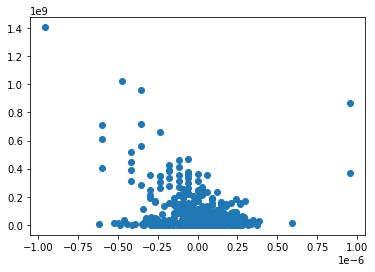

In [280]:
plt.scatter(residuals,y_predicted)

In [271]:
print("MAE",mean_absolute_error(y_test,y_predicted))

MAE 1.2869636217753093e-07


In [272]:
print("MSE",mean_squared_error(y_test,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predicted)))

MSE 3.1555313917408514e-14
RMSE 1.776381544528329e-07


In [279]:
print("R sqaured Value/ co efficient of Determination ",r2_score(y_test,y_predicted))

R sqaured Value/ co efficient of Determination  1.0
